# Arbol Titanic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
dfBoat = pd.read_csv('Titanic-Dataset.csv')
dfBoat.columns = ['id_pasajero','sobrevivio','clase','nombre','sexo','edad',
                  'silbsp','parch','tiquete','tarifa','cabina','embarcado']
dfBoat.head()

,id_pasajero,sobrevivio,clase,nombre,sexo,edad,silbsp,parch,tiquete,tarifa,cabina,embarcado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dfBoat.describe()

,id_pasajero,sobrevivio,clase,edad,silbsp,parch,tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Identificacion de datos faltantes nulos
dfBoat.isnull().sum()

id_pasajero      0
sobrevivio       0
clase            0
nombre           0
sexo             0
edad           177
silbsp           0
parch            0
tiquete          0
tarifa           0
cabina         687
embarcado        2
dtype: int64

In [13]:
#Identificacion de datos faltantes no calculados
dfBoat.isna().sum()

id_pasajero      0
sobrevivio       0
clase            0
nombre           0
sexo             0
edad           177
silbsp           0
parch            0
tiquete          0
tarifa           0
cabina         687
embarcado        2
dtype: int64

In [15]:
#Identificacion de columnas y completitud de los datos
print("Cantidad de Filas y Columnas", dfBoat.shape,"\n")
dfBoat.info()

Cantidad de Filas y Columnas (891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_pasajero  891 non-null    int64  
 1   sobrevivio   891 non-null    int64  
 2   clase        891 non-null    int64  
 3   nombre       891 non-null    object 
 4   sexo         891 non-null    object 
 5   edad         714 non-null    float64
 6   silbsp       891 non-null    int64  
 7   parch        891 non-null    int64  
 8   tiquete      891 non-null    object 
 9   tarifa       891 non-null    float64
 10  cabina       204 non-null    object 
 11  embarcado    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


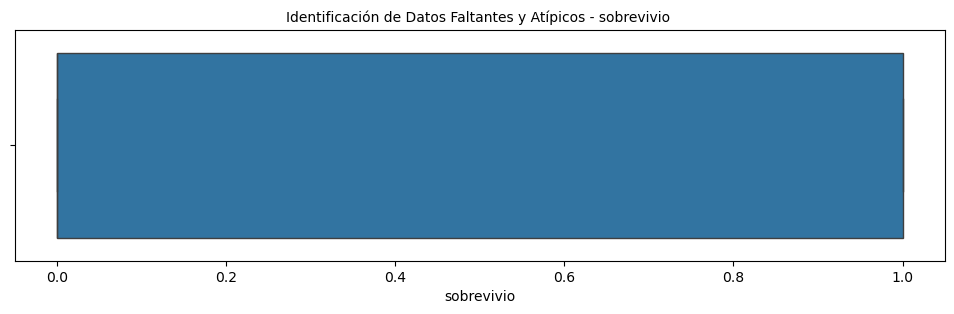

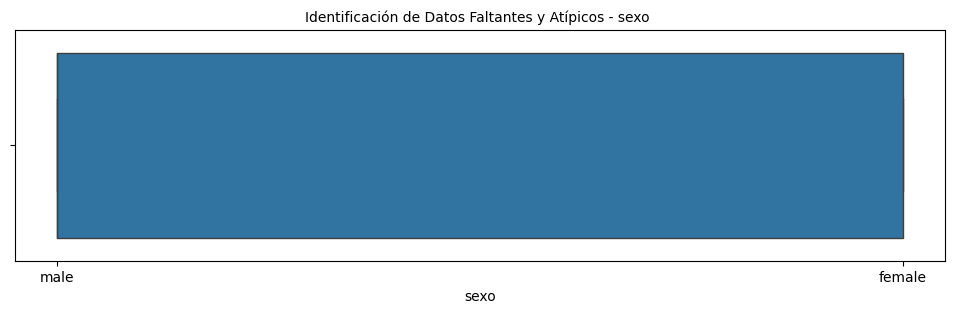

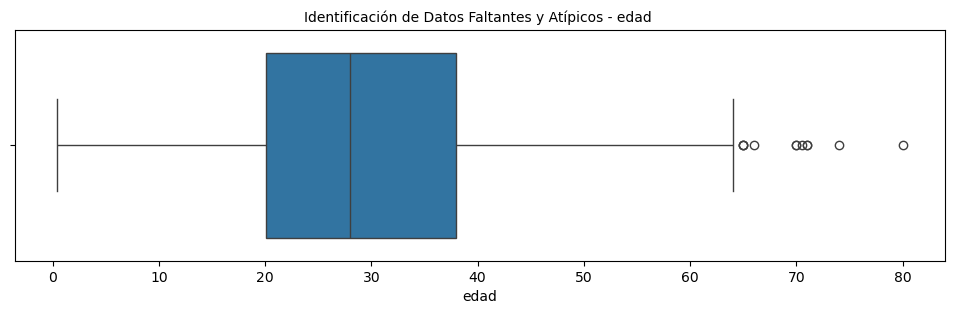

In [17]:
#Identificación de los Datos atípicos
lista = ['sobrevivio','sexo', 'edad']
for columnas in lista:
    plt.figure(figsize=(12, 3))
    sns.boxplot(x=dfBoat[columnas])
    plt.title(f'Identificación de Datos Faltantes y Atípicos - {columnas} ', fontsize=10 )

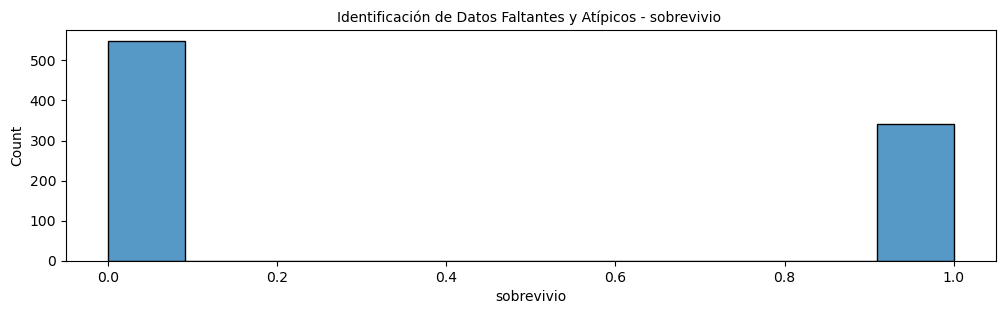

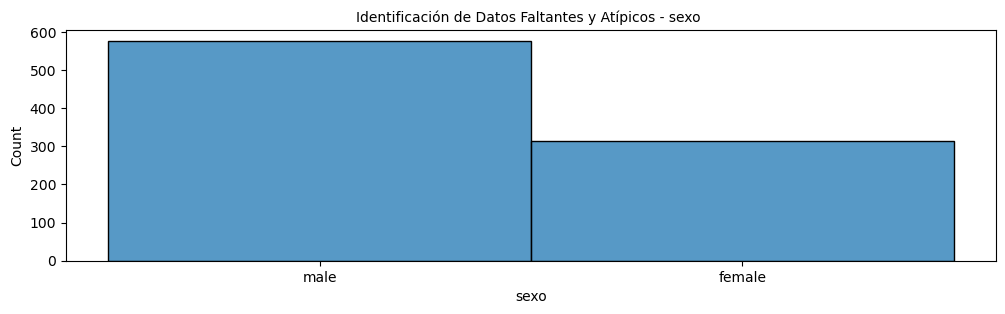

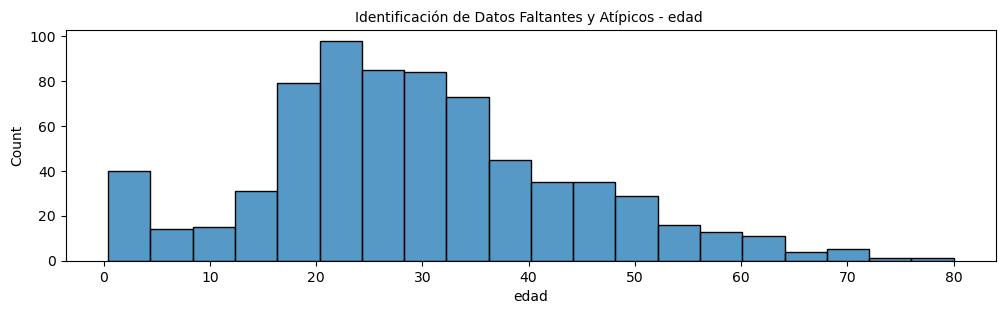

In [19]:
#Histogramas de columnas con valores atipicos
lista = ['sobrevivio','sexo', 'edad']
for columnas in lista:
    plt.figure(figsize=(12, 3))
    sns.histplot(dfBoat[columnas])
    plt.title(f'Identificación de Datos Faltantes y Atípicos - {columnas} ', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [22]:
# Reemplzar datos faltantes en el campo eddad con la media de los datos
dfBoat['edad'] = dfBoat['edad'].fillna(dfBoat['edad'].mean())

# Reemplzar datos faltantes en el campo embarcado con la moda de los datos
dfBoat['embarcado'] = dfBoat['embarcado'].fillna(dfBoat['embarcado'].mode()[0])

dfBoat.isna().sum()

id_pasajero      0
sobrevivio       0
clase            0
nombre           0
sexo             0
edad             0
silbsp           0
parch            0
tiquete          0
tarifa           0
cabina         687
embarcado        0
dtype: int64

In [31]:
# Convertir la valriable categorica sexo en numerica male = 1, female = 0
dfBoat['sexo'] = dfBoat['sexo'].map({'male': 1, 'female': 0})
#Conteo y verificacion de cambios en sexo
sexo_counts = dfBoat['sexo'].value_counts()
print(sexo_counts)

Series([], Name: count, dtype: int64)


In [26]:
#Borrado de columnas no necesarias para el procesos de entrenamiento - Categoricas
dfBoat = dfBoat.drop(['id_pasajero','nombre','tiquete','cabina','embarcado'], axis= 1)
#Columnas finales en las evaluaciones
dfBoat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sobrevivio  891 non-null    int64  
 1   clase       891 non-null    int64  
 2   sexo        891 non-null    int64  
 3   edad        891 non-null    float64
 4   silbsp      891 non-null    int64  
 5   parch       891 non-null    int64  
 6   tarifa      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [33]:
dfBoat['tarifa'].value_counts()

tarifa
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

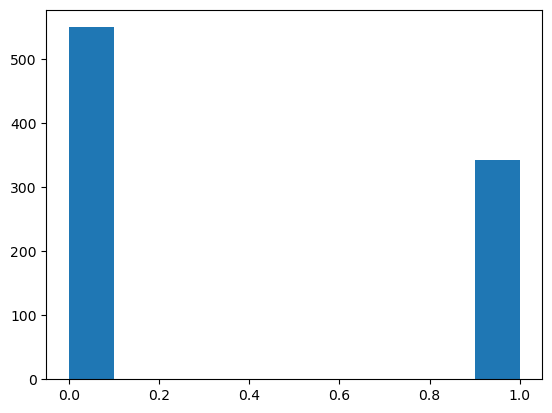

In [35]:
plt.hist(dfBoat['sobrevivio'])

<Axes: xlabel='clase', ylabel='tarifa'>

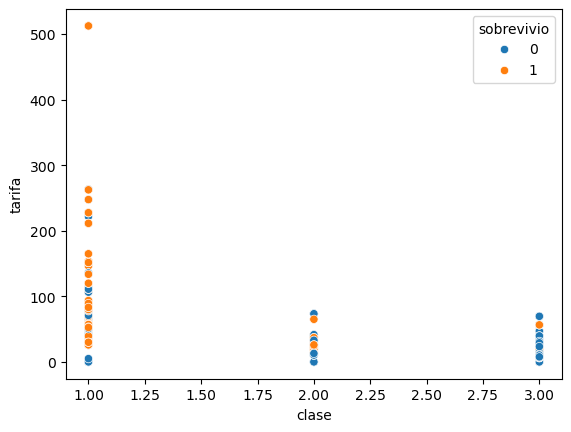

In [37]:
sns.scatterplot(x = "clase", y = "tarifa", hue = "sobrevivio", data = dfBoat)

## 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [40]:
#seleccionar las columnas para el entrenamiento
predictors = dfBoat.drop('sobrevivio',axis=1)
target = dfBoat['sobrevivio']
predictors.head()

,clase,sexo,edad,silbsp,parch,tarifa
0,3,NaN,22.0,1,0,7.2500
1,1,NaN,38.0,1,0,71.2833
2,3,NaN,26.0,0,0,7.9250
3,1,NaN,35.0,1,0,53.1000
4,3,NaN,35.0,0,0,8.0500


In [42]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: sobrevivio, dtype: int64

In [44]:
corr = predictors.corr()
corr

,clase,sexo,edad,silbsp,parch,tarifa
clase,1.000000,NaN,-0.331339,0.083081,0.018443,-0.549500
sexo,NaN,NaN,NaN,NaN,NaN,NaN
edad,-0.331339,NaN,1.000000,-0.232625,-0.179191,0.091566
silbsp,0.083081,NaN,-0.232625,1.000000,0.414838,0.159651
parch,0.018443,NaN,-0.179191,0.414838,1.000000,0.216225
tarifa,-0.549500,NaN,0.091566,0.159651,0.216225,1.000000


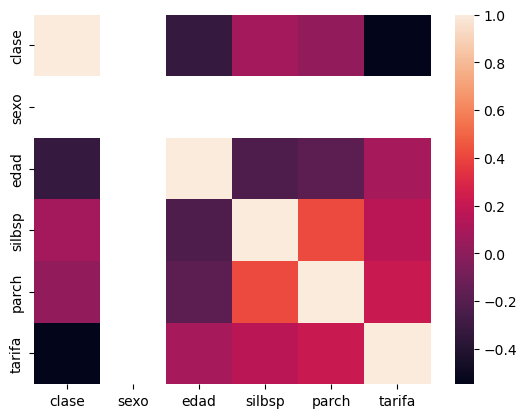

In [46]:
sns.heatmap(corr)
plt.show()

## 5. Entrenar el modelo configurando los diferentes hiperparámetros

[Text(0.4508922230113636, 0.975, 'x[0] <= 2.5\ngini = 0.474\nsamples = 757\nvalue = [465.0, 292.0]'),
 Text(0.205078125, 0.925, 'x[5] <= 13.679\ngini = 0.496\nsamples = 345\nvalue = [158.0, 187.0]'),
 Text(0.06079545454545455, 0.875, 'x[5] <= 7.75\ngini = 0.42\nsamples = 80\nvalue = [56, 24]'),
 Text(0.05625, 0.825, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.06534090909090909, 0.825, 'x[2] <= 27.5\ngini = 0.454\nsamples = 69\nvalue = [45, 24]'),
 Text(0.020454545454545454, 0.775, 'x[2] <= 17.5\ngini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(0.00909090909090909, 0.725, 'x[2] <= 16.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.004545454545454545, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.013636363636363636, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.031818181818181815, 0.725, 'x[5] <= 11.0\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.022727272727272728, 0.675, 'x[2] <= 22.0\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),

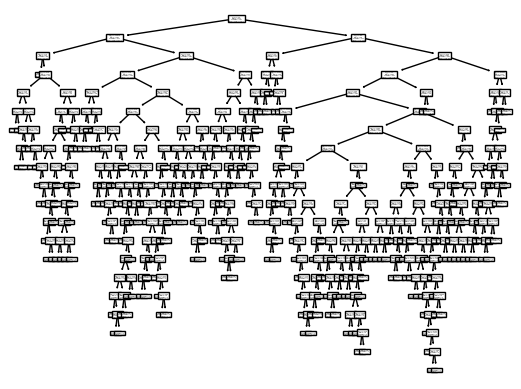

In [49]:
# Porcentaje de datos para entrenamiento (train) = 85% , y para prueba (test) = 15%
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15, random_state=13)
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [51]:
predicciones = arbol.predict(X_test)
predicciones

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0], dtype=int64)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [54]:
# Desempeño del Arbol de desiciones
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        84
           1       0.46      0.52      0.49        50

    accuracy                           0.60       134
   macro avg       0.58      0.58      0.58       134
weighted avg       0.61      0.60      0.60       134



In [56]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5970149253731343

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

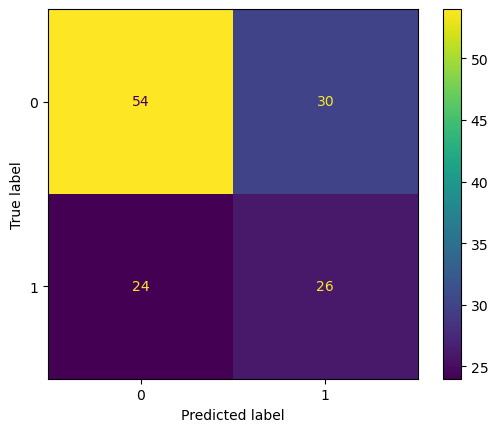

In [59]:
# Curva de precisón del modelo
cm=confusion_matrix(y_test,predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: ylabel='sobrevivio'>

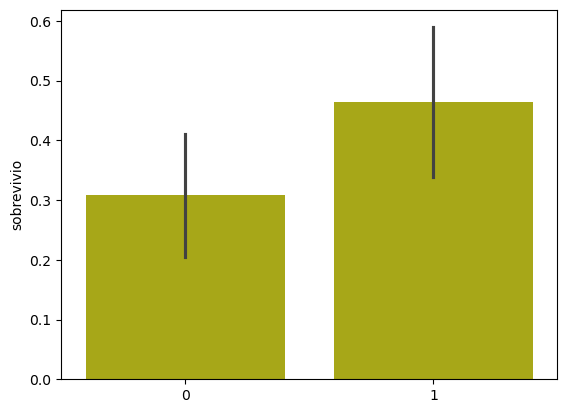

In [61]:
sns.barplot(x=predicciones, y=y_test, color='y')

## 8. Interpretar, analizar y documentar los resultados obtenidos

La presicion del modelo entrega la proporcion de veces que el modelo acierta en sus predicciones para este caso, la precisión "sobrevivio" es de 0,59, lo que indica que el 59% de los casos predichos de acuerdo a la superviviencia del pasajero despues del accidente del titanic, teniendo en cuenta los demas campos fueron acertados en su nivel de superviviencia.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para 0 en "sobrevivio" es de 0,64 lo que indica que el modelo identificó correctamente al 64% de las personas que no sobrevivieron al accidente del titanic.

El Recall para la superviviencia clasificada como 1 es 0,52, lo que significa que el modelo identificó correctamente el 52% de las personas que pudieron sobrevivir. En otras palabras, el Recall nos proporciona información sobre la capacidad del modelo para detectar positivos verdaderos (en este caso, la posibilidad de sobrevivir). Cuanto mayor sea el Recall, mejor será la capacidad del modelo para identificar correctamente los casos positivos reales.

La metrica F1 score que combina tanto la precisión como el Recall en un solo valor. Proporciona una medida equilibrada del rendimiento del modelo en clasificación. la puntuación F1 para la no posibilidad de no sobrevivir es 0,67 lo que sugiere un equilibrio entre la precisión y el recuerdo.

El AUC es 0,66 lo que significa que el 66 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.